In [2]:
# data => wisc_bc_data.csv

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('wisc_bc_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
x = df.drop(['id', 'diagnosis'], axis = 1)
y = df['diagnosis']

#### normalization

In [17]:
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
x_scaled = sca.fit_transform(x)

# PCA

In [20]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA()
x_pca = pca.fit_transform(x_scaled)

In [30]:
x_pca;

In [26]:
var = pca.explained_variance_ratio_

In [28]:
var

array([5.30976894e-01, 1.72834896e-01, 7.11444201e-02, 6.41125883e-02,
       4.08607204e-02, 3.07149442e-02, 1.58083746e-02, 1.19147161e-02,
       9.88429103e-03, 9.45446106e-03, 8.49396551e-03, 7.57976457e-03,
       6.56638137e-03, 4.74811462e-03, 2.69423338e-03, 2.57754484e-03,
       1.83755588e-03, 1.51271660e-03, 1.37718463e-03, 1.05959242e-03,
       9.83061040e-04, 7.84496266e-04, 5.28060046e-04, 5.09986666e-04,
       4.30073326e-04, 3.29617326e-04, 1.90574049e-04, 5.59104265e-05,
       2.88966877e-05, 5.96453235e-06])

In [32]:
x.shape

(569, 30)

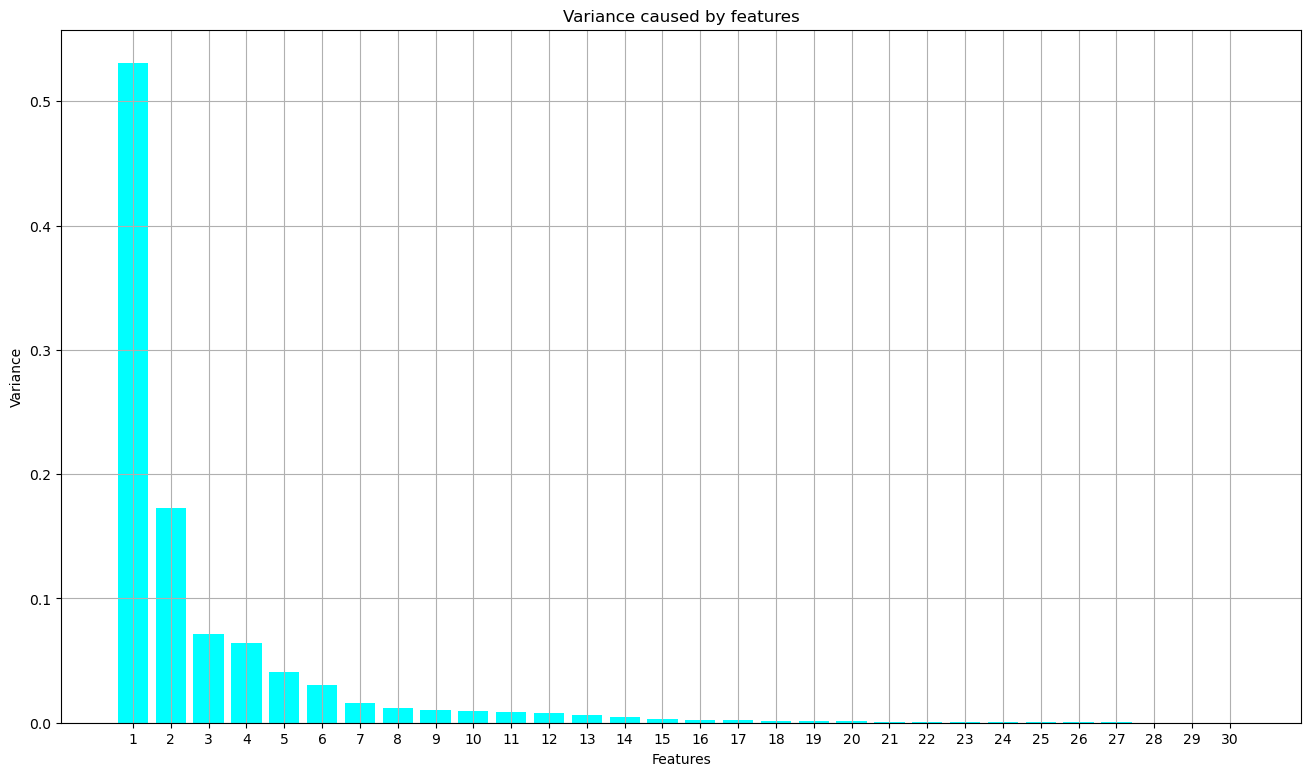

In [38]:
plt.figure(figsize=(16, 9))
plt.title('Variance caused by features')
plt.xlabel('Features')
plt.ylabel('Variance')
plt.xticks(range(1,31,1))
plt.bar(range(1, 31), var, color = 'cyan')
plt.grid()

In [40]:
pca = PCA(n_components= 5)

In [46]:
x_pca = pca.fit_transform(x_scaled)

In [48]:
x_pca

array([[ 1.38702121e+00,  4.26895331e-01, -5.41702774e-01,
         4.84831614e-02, -7.21967194e-02],
       [ 4.62308252e-01, -5.56946740e-01, -2.05174495e-01,
        -4.28298225e-02,  1.61101876e-02],
       [ 9.54621472e-01, -1.09701150e-01, -1.47848422e-01,
        -1.06753739e-03, -3.37980478e-02],
       ...,
       [ 2.26311313e-01, -2.87945766e-01,  3.15224056e-01,
        -1.17468040e-02,  2.18516598e-01],
       [ 1.67783369e+00,  3.35945956e-01,  2.96116018e-01,
        -1.56304850e-01,  7.02040188e-02],
       [-9.05068041e-01, -1.04108743e-01,  3.82859825e-01,
         6.83604648e-02,  7.29874447e-02]])

In [50]:
x_pca.shape

(569, 5)

### cross validation

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, y,
                                                   random_state= 0
                                                   )

#### build the model

In [69]:
from sklearn.svm import SVC
svc = SVC(kernel= 'rbf')
svc.fit(x_train, y_train)

SVC()

#### Evaluate

In [72]:
y_pred = svc.predict(x_test)

In [74]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

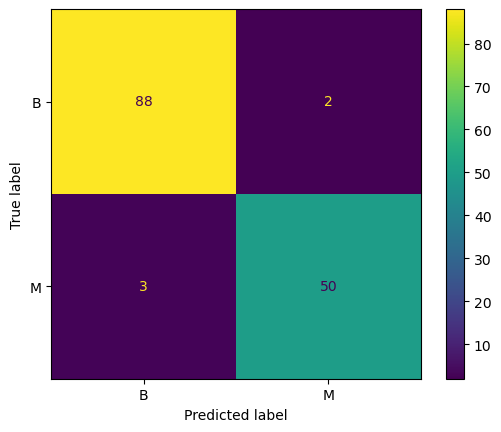

In [76]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [78]:
accuracy_score(y_test, y_pred)

0.965034965034965